Dataset Link : https://www.timeseriesclassification.com/description.php?Dataset=Fish

In [ ]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r '/content/drive/MyDrive/Fish.zip' '/content'

In [ ]:
!unzip -q '/content/drive/MyDrive/Fish.zip'

In [ ]:
filename1='/content/Fish_TRAIN.arff'
filename2='/content/Fish_TEST.arff'
train_data = arff.loadarff(filename1)
test_data = arff.loadarff(filename2)

In [ ]:
train_df = pd.DataFrame(train_data[0])
test_df=pd.DataFrame(test_data[0])

In [ ]:
train_df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att425,att426,att427,att428,att429,att430,att431,att432,att433,att434,att435,att436,att437,att438,att439,att440,att441,att442,att443,att444,att445,att446,att447,att448,att449,att450,att451,att452,att453,att454,att455,att456,att457,att458,att459,att460,att461,att462,att463,target
0,1.950905,1.926654,1.895665,1.858015,1.820566,1.790278,1.767617,1.731273,1.695241,1.658904,1.622969,1.586888,1.557218,1.521723,1.486103,1.450451,1.414024,1.377698,1.341477,1.305365,1.269866,1.234773,1.198903,1.163301,1.126734,1.092243,1.056584,1.021037,0.985608,0.949550,0.914845,0.878732,0.842699,0.806750,0.770887,0.735115,0.699436,0.663854,0.626558,0.591141,...,0.646395,0.683248,0.720165,0.756933,0.793249,0.829672,0.866610,0.903663,0.940976,0.978338,1.015746,1.053199,1.089858,1.127421,1.164567,1.201911,1.239612,1.277348,1.315119,1.352301,1.390126,1.428013,1.465929,1.503314,1.540776,1.578319,1.615622,1.652763,1.690570,1.728209,1.766062,1.804372,1.842172,1.856651,1.862821,1.901062,1.939491,1.950465,1.950784,b'7'
1,1.966652,1.940113,1.915149,1.945426,1.959289,1.945119,1.919668,1.881009,1.856474,1.818359,1.780485,1.742000,1.703821,1.666606,1.628375,1.591032,1.552923,1.516177,1.478176,1.439941,1.404144,1.366323,1.330969,1.293702,1.258603,1.221986,1.184996,1.150198,1.114630,1.080059,1.045312,1.010955,0.974990,0.939200,0.906201,0.872122,0.840182,0.805546,0.771675,0.737286,...,0.494249,0.534534,0.572364,0.612595,0.650754,0.690837,0.729397,0.767743,0.807656,0.845500,0.885417,0.924163,0.963020,1.001984,1.041051,1.080218,1.118474,1.157810,1.197241,1.236765,1.276250,1.315002,1.354848,1.394813,1.434781,1.474182,1.514289,1.554086,1.594347,1.634491,1.674922,1.715240,1.755760,1.796475,1.823922,1.865034,1.893001,1.934836,1.966555,b'4'
2,2.005598,1.994541,1.987894,1.970090,1.939982,1.903903,1.864944,1.826148,1.787538,1.749095,1.710781,1.672604,1.634694,1.596742,1.558857,1.520917,1.483069,1.445042,1.407299,1.369377,1.331597,1.294070,1.256724,1.219145,1.181652,1.144629,1.107333,1.070451,1.033465,0.996482,0.959533,0.922449,0.885673,0.848589,0.811751,0.775243,0.738442,0.701737,0.664971,0.627992,...,0.633010,0.670360,0.707532,0.745853,0.784197,0.822562,0.860948,0.898833,0.937172,0.975026,1.012915,1.050671,1.087865,1.125138,1.163177,1.200727,1.238325,1.274973,1.312203,1.349972,1.388244,1.422498,1.460387,1.498315,1.535865,1.573466,1.610847,1.646973,1.675219,1.703027,1.732659,1.767108,1.805602,1.843613,1.882412,1.920517,1.954640,1.978782,2.000019,b'6'
3,1.878433,1.871449,1.844617,1.811412,1.777580,1.742792,1.709533,1.677253,1.643310,1.609233,1.577888,1.545911,1.512447,1.480485,1.450047,1.417959,1.385202,1.352954,1.320761,1.288783,1.257024,1.225491,1.194190,1.162516,1.129126,1.095784,1.065351,1.035180,1.005281,0.970898,0.939784,0.910609,0.881314,0.846279,0.811334,0.782716,0.748947,0.719967,0.687453,0.658084,...,0.554334,0.593895,0.633511,0.673054,0.712770,0.752560,0.792420,0.831927,0.871850,0.911838,0.952062,0.992578,1.032467,1.073173,1.113542,1.154012,1.195048,1.235966,1.277495,1.318465,1.359182,1.401394,1.442246,1.484725,1.527402,1.569688,1.611839,1.656100,1.698508,1.743214,1.788203,1.815747,1.842526,1.855507,1.816607,1.781343,1.806174,1.848362,1.878359,b'4'
4,1.987342,1.968160,1.942338,1.909628,1.872595,1.843493,1.810693,1.774459,1.738029,1.703180,1.671636,1.636475,1.597700,1.559087,1.520641,1.482239,1.443966,1.405819,1.367822,1.329960,1.292246,1.254561,1.217038,1.179659,1.142261,1.105303,1.068523,1.031681,0.995067,0.958213,0.921457,0.884834,0.848351,0.811435,0.774654,0.737908,0.701157,0.664151,0.627070,0.590652,...,0.658886,0.695619,0.731965,0.769479,0.806331,0.843825,0.880590,0.916475,0.952656,0.989431,1.025574,1.060081,1.094764,1.131232,1.166984,1.203620,1.239574,1.276669,1.313948,1.350857,1.387828,1.424860,1.461950,1.499747,1.537004,1.574

In [ ]:
train_dataset = train_df.to_numpy()
test_dataset=test_df.to_numpy()
train_dataset.shape

(175, 464)

In [ ]:
X_train = train_dataset[:,0:463]
y_train = train_dataset[:,463]
X_test=test_dataset[:,0:463]
y_test=test_dataset[:,463]

In [ ]:
X_train.shape

(175, 463)

In [ ]:
y_train.shape

(175,)

In [ ]:
X_test.shape

(175, 463)

In [ ]:
y_test.shape

(175,)

In [ ]:
y_train=np.asarray(y_train).astype(np.float)
y_test=np.asarray(y_test).astype(np.float)

In [ ]:
y_train

array([7., 4., 6., 4., 7., 2., 2., 4., 7., 4., 6., 5., 5., 1., 6., 5., 3.,
       3., 3., 7., 3., 3., 6., 4., 1., 3., 4., 4., 3., 5., 7., 2., 1., 3.,
       3., 7., 5., 2., 5., 6., 3., 3., 5., 3., 3., 6., 6., 5., 1., 6., 7.,
       6., 5., 7., 6., 1., 1., 2., 7., 7., 4., 2., 1., 7., 6., 5., 4., 1.,
       6., 5., 5., 7., 4., 3., 3., 3., 5., 7., 4., 2., 4., 2., 5., 6., 3.,
       6., 4., 1., 1., 5., 3., 6., 2., 6., 4., 3., 5., 6., 4., 2., 6., 2.,
       3., 4., 3., 3., 2., 2., 4., 1., 7., 4., 7., 4., 1., 3., 7., 1., 6.,
       7., 6., 5., 1., 1., 2., 6., 2., 6., 3., 5., 3., 3., 1., 4., 7., 7.,
       2., 2., 6., 7., 1., 7., 7., 1., 7., 1., 5., 5., 1., 6., 7., 2., 2.,
       1., 2., 7., 2., 2., 1., 3., 4., 2., 7., 1., 1., 5., 2., 6., 2., 1.,
       7., 7., 5., 1., 3.])

In [ ]:
y_test

array([5., 4., 2., 7., 1., 4., 7., 4., 5., 2., 5., 2., 3., 7., 5., 6., 6.,
       4., 1., 2., 4., 7., 3., 5., 3., 6., 2., 6., 4., 1., 6., 1., 2., 1.,
       1., 3., 4., 4., 7., 1., 1., 1., 7., 7., 1., 1., 4., 4., 6., 4., 4.,
       6., 1., 6., 7., 5., 5., 6., 4., 4., 5., 7., 5., 2., 6., 3., 6., 3.,
       5., 4., 4., 6., 7., 4., 7., 1., 3., 4., 2., 2., 2., 5., 2., 5., 2.,
       2., 6., 6., 7., 4., 5., 3., 2., 5., 3., 1., 3., 4., 7., 4., 2., 7.,
       6., 7., 2., 1., 5., 2., 4., 4., 7., 4., 3., 5., 2., 1., 6., 1., 7.,
       7., 1., 3., 5., 3., 2., 6., 5., 6., 6., 3., 6., 1., 5., 7., 4., 7.,
       5., 3., 6., 5., 3., 6., 7., 2., 5., 1., 5., 5., 4., 3., 2., 3., 5.,
       3., 7., 1., 6., 4., 3., 2., 1., 1., 1., 5., 3., 2., 5., 2., 6., 6.,
       4., 2., 4., 5., 3.])

In [ ]:
np.unique(y_train)

array([1., 2., 3., 4., 5., 6., 7.])

In [ ]:
scaled_Xtrain=scaler.fit_transform(X_train)
scaled_Xtest=scaler.fit_transform(X_test)

In [ ]:
scaled_Xtrain

array([[0.79259383, 0.78000037, 0.76868866, ..., 0.82666696, 0.81209498,
        0.79589711],
       [0.81125776, 0.79630191, 0.79340509, ..., 0.76978503, 0.7934585 ,
        0.81454665],
       [0.85741664, 0.86222585, 0.88568235, ..., 0.84520255, 0.84586212,
        0.85412003],
       ...,
       [1.        , 1.        , 1.        , ..., 0.98740011, 1.        ,
        1.        ],
       [0.72710412, 0.70744887, 0.68801239, ..., 0.71904239, 0.73102712,
        0.72640039],
       [0.97548783, 0.95485263, 0.95358516, ..., 0.9948049 , 0.9845964 ,
        0.98126106]])

In [ ]:
scaled_Xtest

array([[0.87970697, 0.89635264, 0.88739152, ..., 0.84755998, 0.86769015,
        0.87459913],
       [0.72710902, 0.74307799, 0.74424565, ..., 0.7038007 , 0.70822099,
        0.72046379],
       [0.72324801, 0.73903468, 0.75327503, ..., 0.66567629, 0.69612086,
        0.72215791],
       ...,
       [0.8836554 , 0.85867204, 0.85056602, ..., 0.89657735, 0.88213312,
        0.8820142 ],
       [0.89500132, 0.87820575, 0.87084688, ..., 0.90642164, 0.89179619,
        0.88321761],
       [0.89319528, 0.87467342, 0.85330862, ..., 0.94308861, 0.91045807,
        0.89754765]])

In [ ]:
from keras.layers import Dropout
model=Sequential()
model.add(Dense(units=64, activation='relu'))
model.add(Dense(32, activation='relu'))


model.add(Dense(8, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy',  optimizer=opt,metrics = ['accuracy'])

In [ ]:
#opt = keras.optimizers.Adam(learning_rate=0.0001)
#sgd = keras.optimizers.SGD(lr=0.0001, momentum=0.8)
#model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
history=model.fit(scaled_Xtrain,y_train, epochs=500, validation_data=(scaled_Xtest,y_test))

Epoch 1/500
6/6 [==============================] - 0s 13ms/step - loss: 0.4611 - accuracy: 0.8914 - val_loss: 0.7930 - val_accuracy: 0.7314
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 0.4618 - accuracy: 0.8971 - val_loss: 0.7805 - val_accuracy: 0.7486
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 0.4573 - accuracy: 0.8914 - val_loss: 0.7934 - val_accuracy: 0.7314
Epoch 4/500
6/6 [==============================] - 0s 7ms/step - loss: 0.4550 - accuracy: 0.9086 - val_loss: 0.7918 - val_accuracy: 0.7257
Epoch 5/500
6/6 [==============================] - 0s 8ms/step - loss: 0.4537 - accuracy: 0.9029 - val_loss: 0.7947 - val_accuracy: 0.7257
Epoch 6/500
6/6 [==============================] - 0s 7ms/step - loss: 0.4541 - accuracy: 0.9086 - val_loss: 0.8117 - val_accuracy: 0.7257
Epoch 7/500
6/6 [==============================] - 0s 9ms/step - loss: 0.4513 - accuracy: 0.9086 - val_loss: 0.7912 - val_accuracy: 0.7314
Epoch 8/500
6/6 [=========

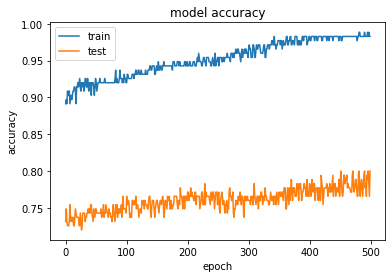

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

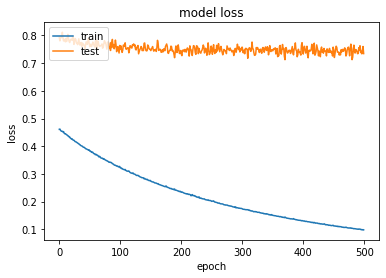

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()